Choose a heuristic:
1. Minimum Remaining Values (MRV)
2. Degree Heuristic
Enter 1 or 2: 2


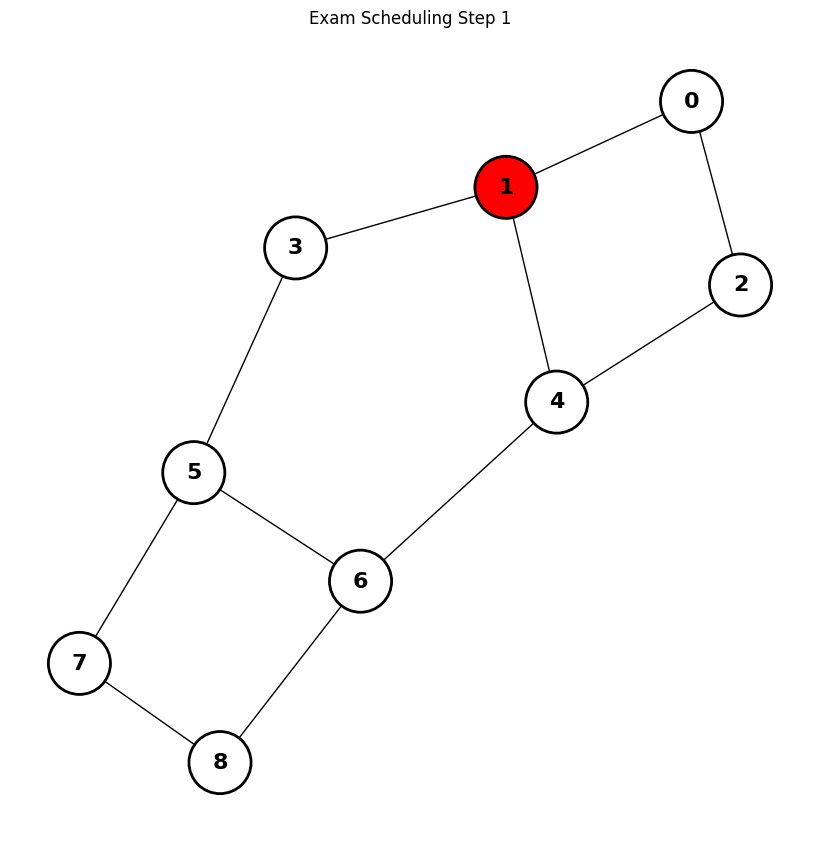

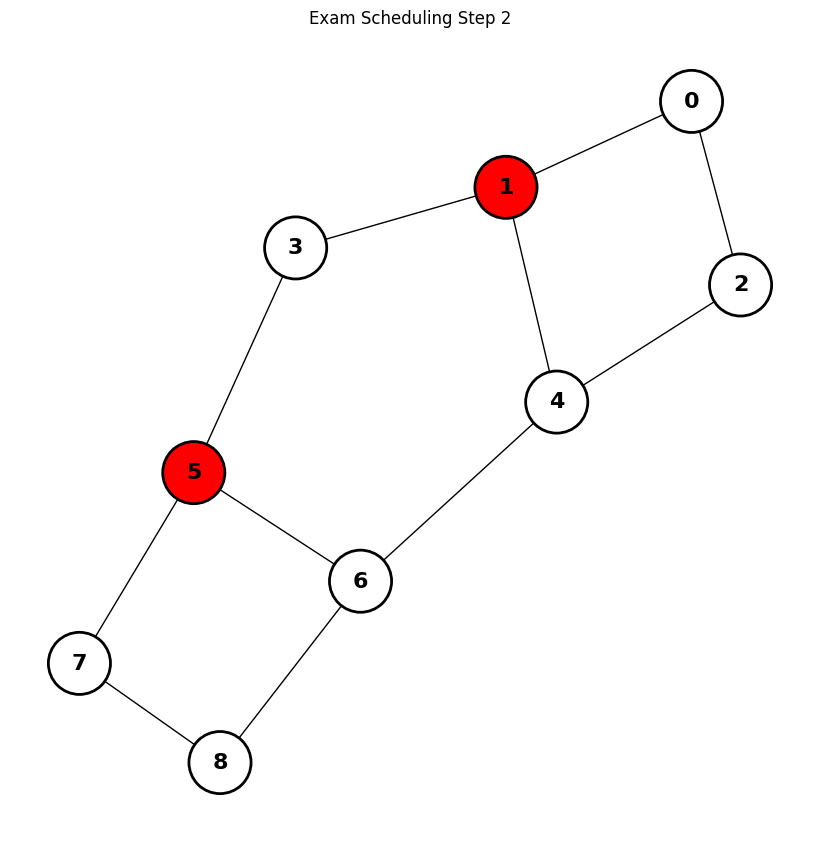

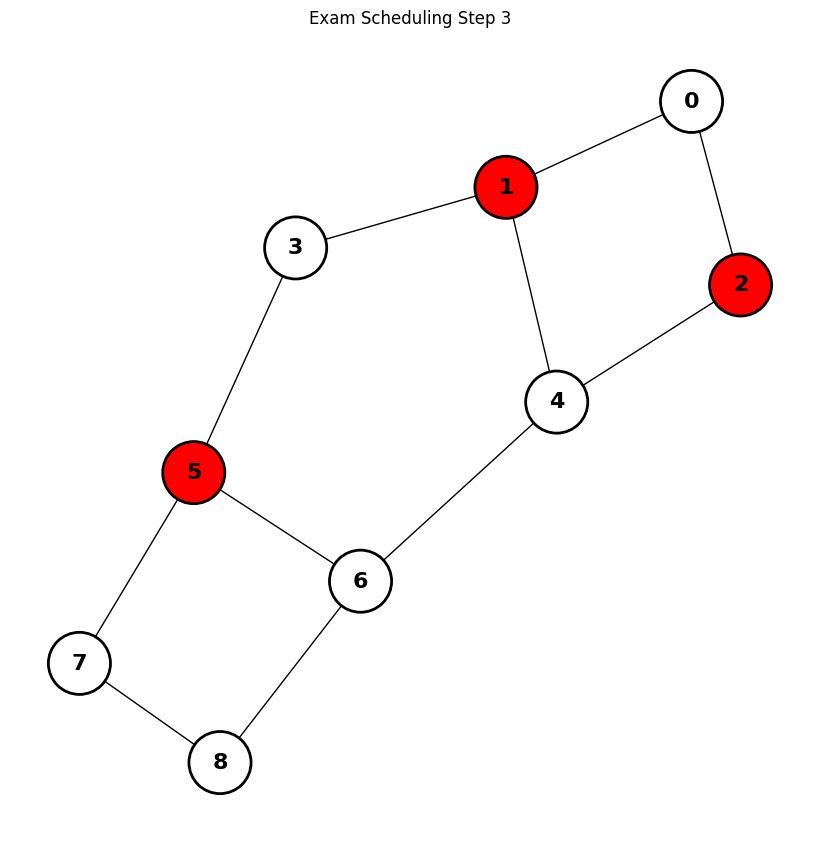

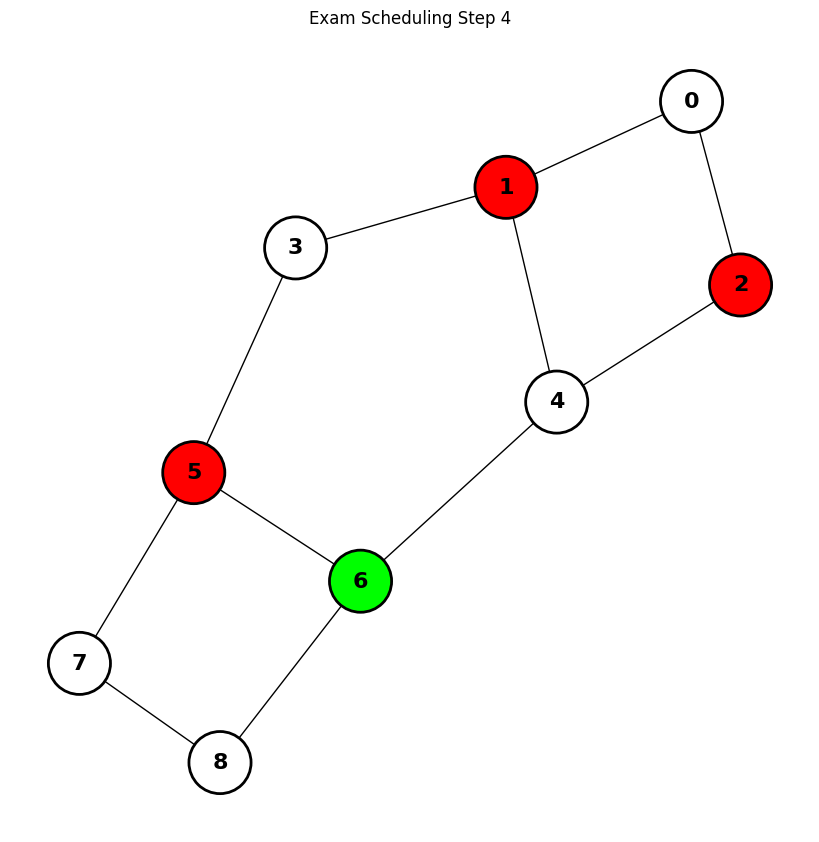

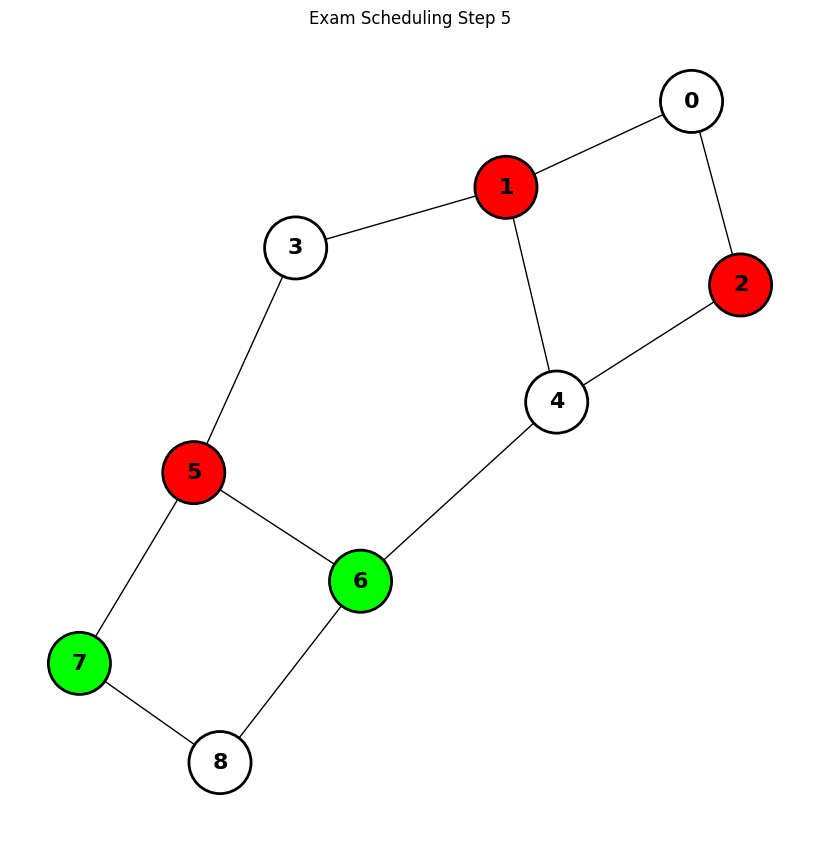

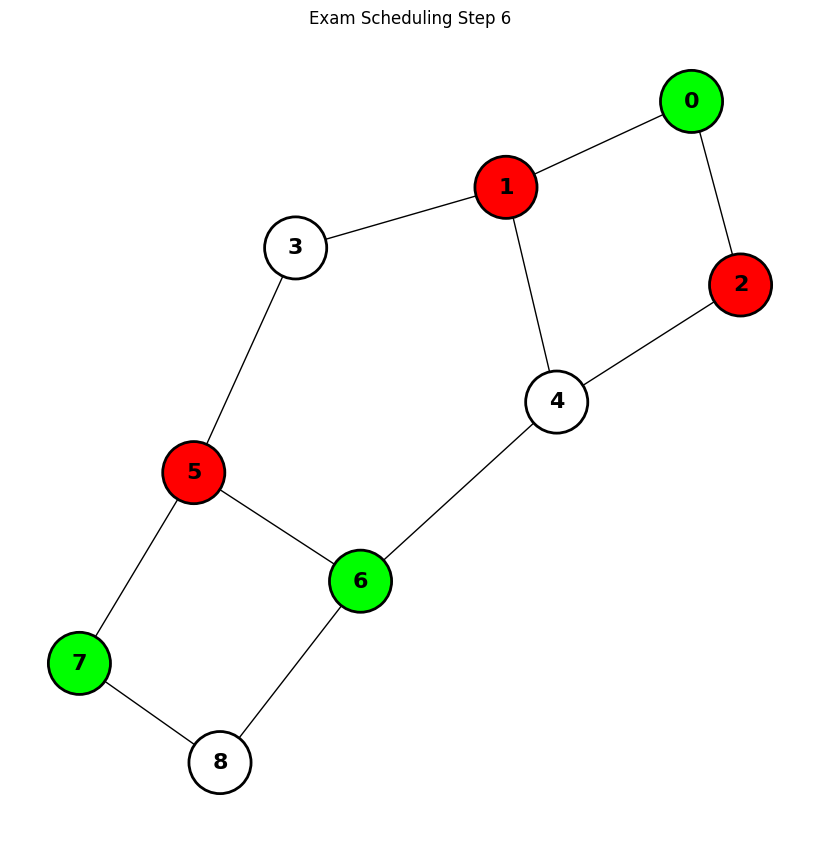

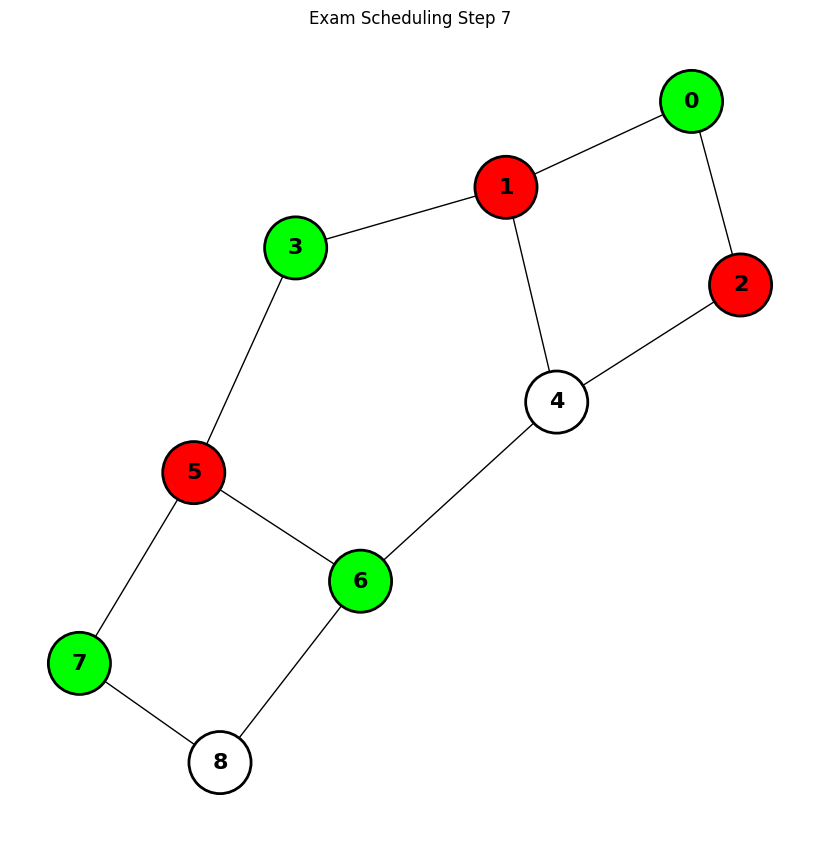

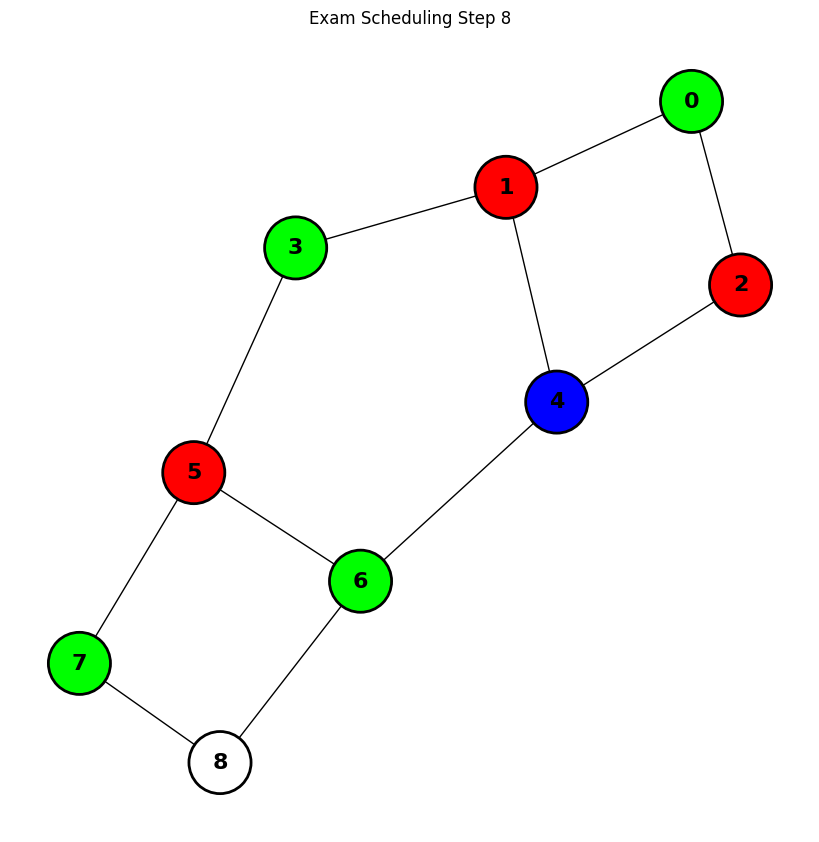

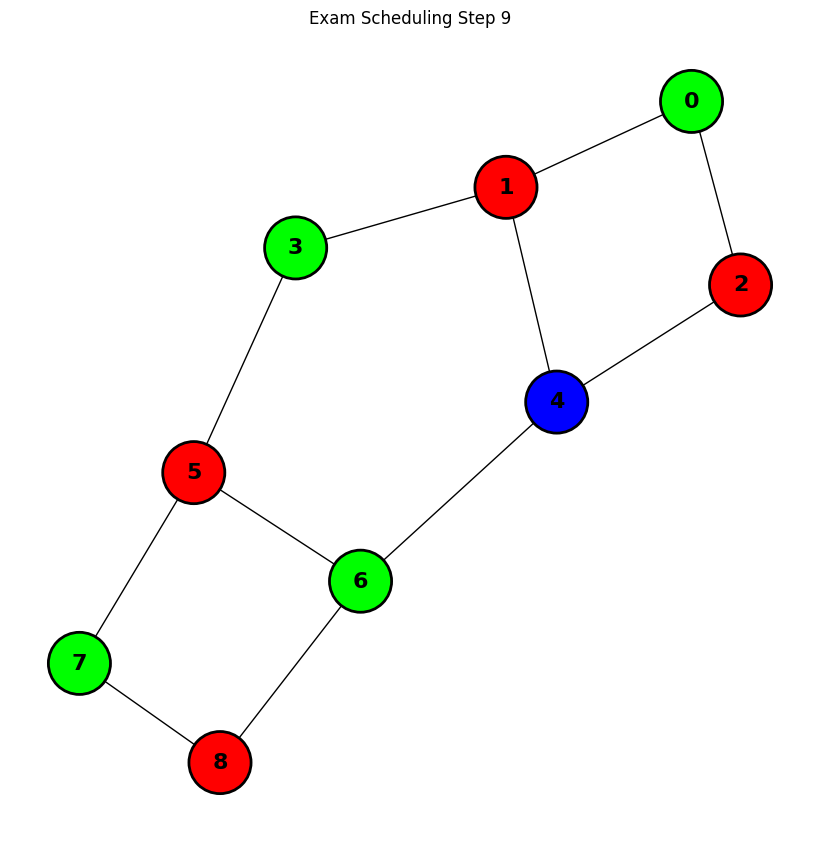

Final Assignment (Exam Schedule): {1: 'Slot 1', 5: 'Slot 1', 2: 'Slot 1', 6: 'Slot 2', 7: 'Slot 2', 0: 'Slot 2', 3: 'Slot 2', 4: 'Slot 3', 8: 'Slot 1'}


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph with vertices representing exams and edges representing conflicts (students in common)
G = nx.Graph()

# Example scenario: Each node represents an exam, and edges represent shared students (conflicts)
# Example: Exams 0 and 1 share students, hence they can't be in the same time slot
edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 4), (3, 5), (4, 6), (5, 6), (5, 7), (6, 8), (7, 8)]
G.add_edges_from(edges)

# Step 2: Define available time slots
time_slots = ['Slot 1', 'Slot 2', 'Slot 3']

# Step 3: Visualize the graph coloring (exam scheduling) step by step
def visualize_graph(assignment, step):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)

    # Assign colors (time slots) to nodes (exams) based on current assignment
    for node, color in assignment.items():
        if color == 'Slot 1':
            node_colors[node] = '#FF0000'
        elif color == 'Slot 2':
            node_colors[node] = '#00FF00'
        elif color == 'Slot 3':
            node_colors[node] = '#0000FF'

    # Draw the graph with current color assignments (exam scheduling)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Exam Scheduling Step {step}")
    plt.show()

# Step 4: Function to check if a time slot assignment is valid
def is_valid_color(node, time_slot, assignment):
    # Check if neighboring exams (students in common) have the same time slot
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == time_slot:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_color(node, time_slot, assignment) for time_slot in time_slots)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with MRV and Degree Heuristic
def backtracking_with_heuristics(assignment, heuristic, step):
    if len(assignment) == len(G.nodes):
        return assignment  # All exams are scheduled

    # Choose the next exam to assign a time slot using the chosen heuristic
    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(assignment)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(assignment)
    else:
        node = list(G.nodes)[len(assignment)]  # Default to sequential assignment

    for time_slot in time_slots:
        if is_valid_color(node, time_slot, assignment):
            assignment[node] = time_slot  # Assign the time slot
            visualize_graph(assignment, step)  # Visualize the current step
            result = backtracking_with_heuristics(assignment, heuristic, step + 1)
            if result:
                return result  # Return if a valid scheduling is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Function to let user choose between MRV and Degree Heuristic
def color_graph_with_backtracking():
    print("Choose a heuristic:")
    print("1. Minimum Remaining Values (MRV)")
    print("2. Degree Heuristic")
    choice = input("Enter 1 or 2: ")

    if choice == '1':
        heuristic = 'MRV'
    elif choice == '2':
        heuristic = 'Degree'
    else:
        print("Invalid choice. Defaulting to sequential assignment.")
        heuristic = None

    final_assignment = backtracking_with_heuristics({}, heuristic, 1)
    print("Final Assignment (Exam Schedule):", final_assignment)

# Step 9: Run the exam scheduling with backtracking and heuristic of choice
color_graph_with_backtracking()